In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
df = pd.read_csv('./data/bachelor/data/analysis_result/trial9/data_9.csv', index_col=0)
df_d = pd.read_csv('./data/bachelor/data/analysis_result/trial9/delaunay_9.csv', index_col=0)
df_kde = pd.read_csv('./data/bachelor/data/analysis_result/trial9/kde_9.csv', index_col=0)
df_v = pd.read_csv('./data/bachelor/data/analysis_result/trial9/voronoi_9.csv', index_col=0)

Md = np.array(df_d.sort_values('volume', ascending=False).head(int(len(df_d) * 0.0001))[['x', 'y', 'z']])
Mkde = np.array(df_kde.sort_values('density', ascending=True).head(int(len(df_kde) * 0.0001))[['x', 'y', 'z']])
Mv = np.array(df_v.sort_values('volume', ascending=False).head(int(len(df_v) * 0.0001))[['x', 'y', 'z']])

In [22]:
df_d.groupby(['trial', 'cycle', 'reprica'], as_index=False).mean().sort_values('volume', ascending=False)

Md_group = np.array(df_d[(df_d['trial'] == 1) & (df_d['cycle'] == 26) & (df_d['reprica'] == 21)][['x', 'y', 'z']])

In [23]:
df = pd.read_csv('./data/bachelor/data/analysis_result/trial1/data.csv', index_col=0)

In [5]:
list(df_kde[df_kde['cycle']==28].density)[99:120]

[0.0634936359342433,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342435,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409,
 0.0634936359342409]

<IPython.core.display.Javascript object>


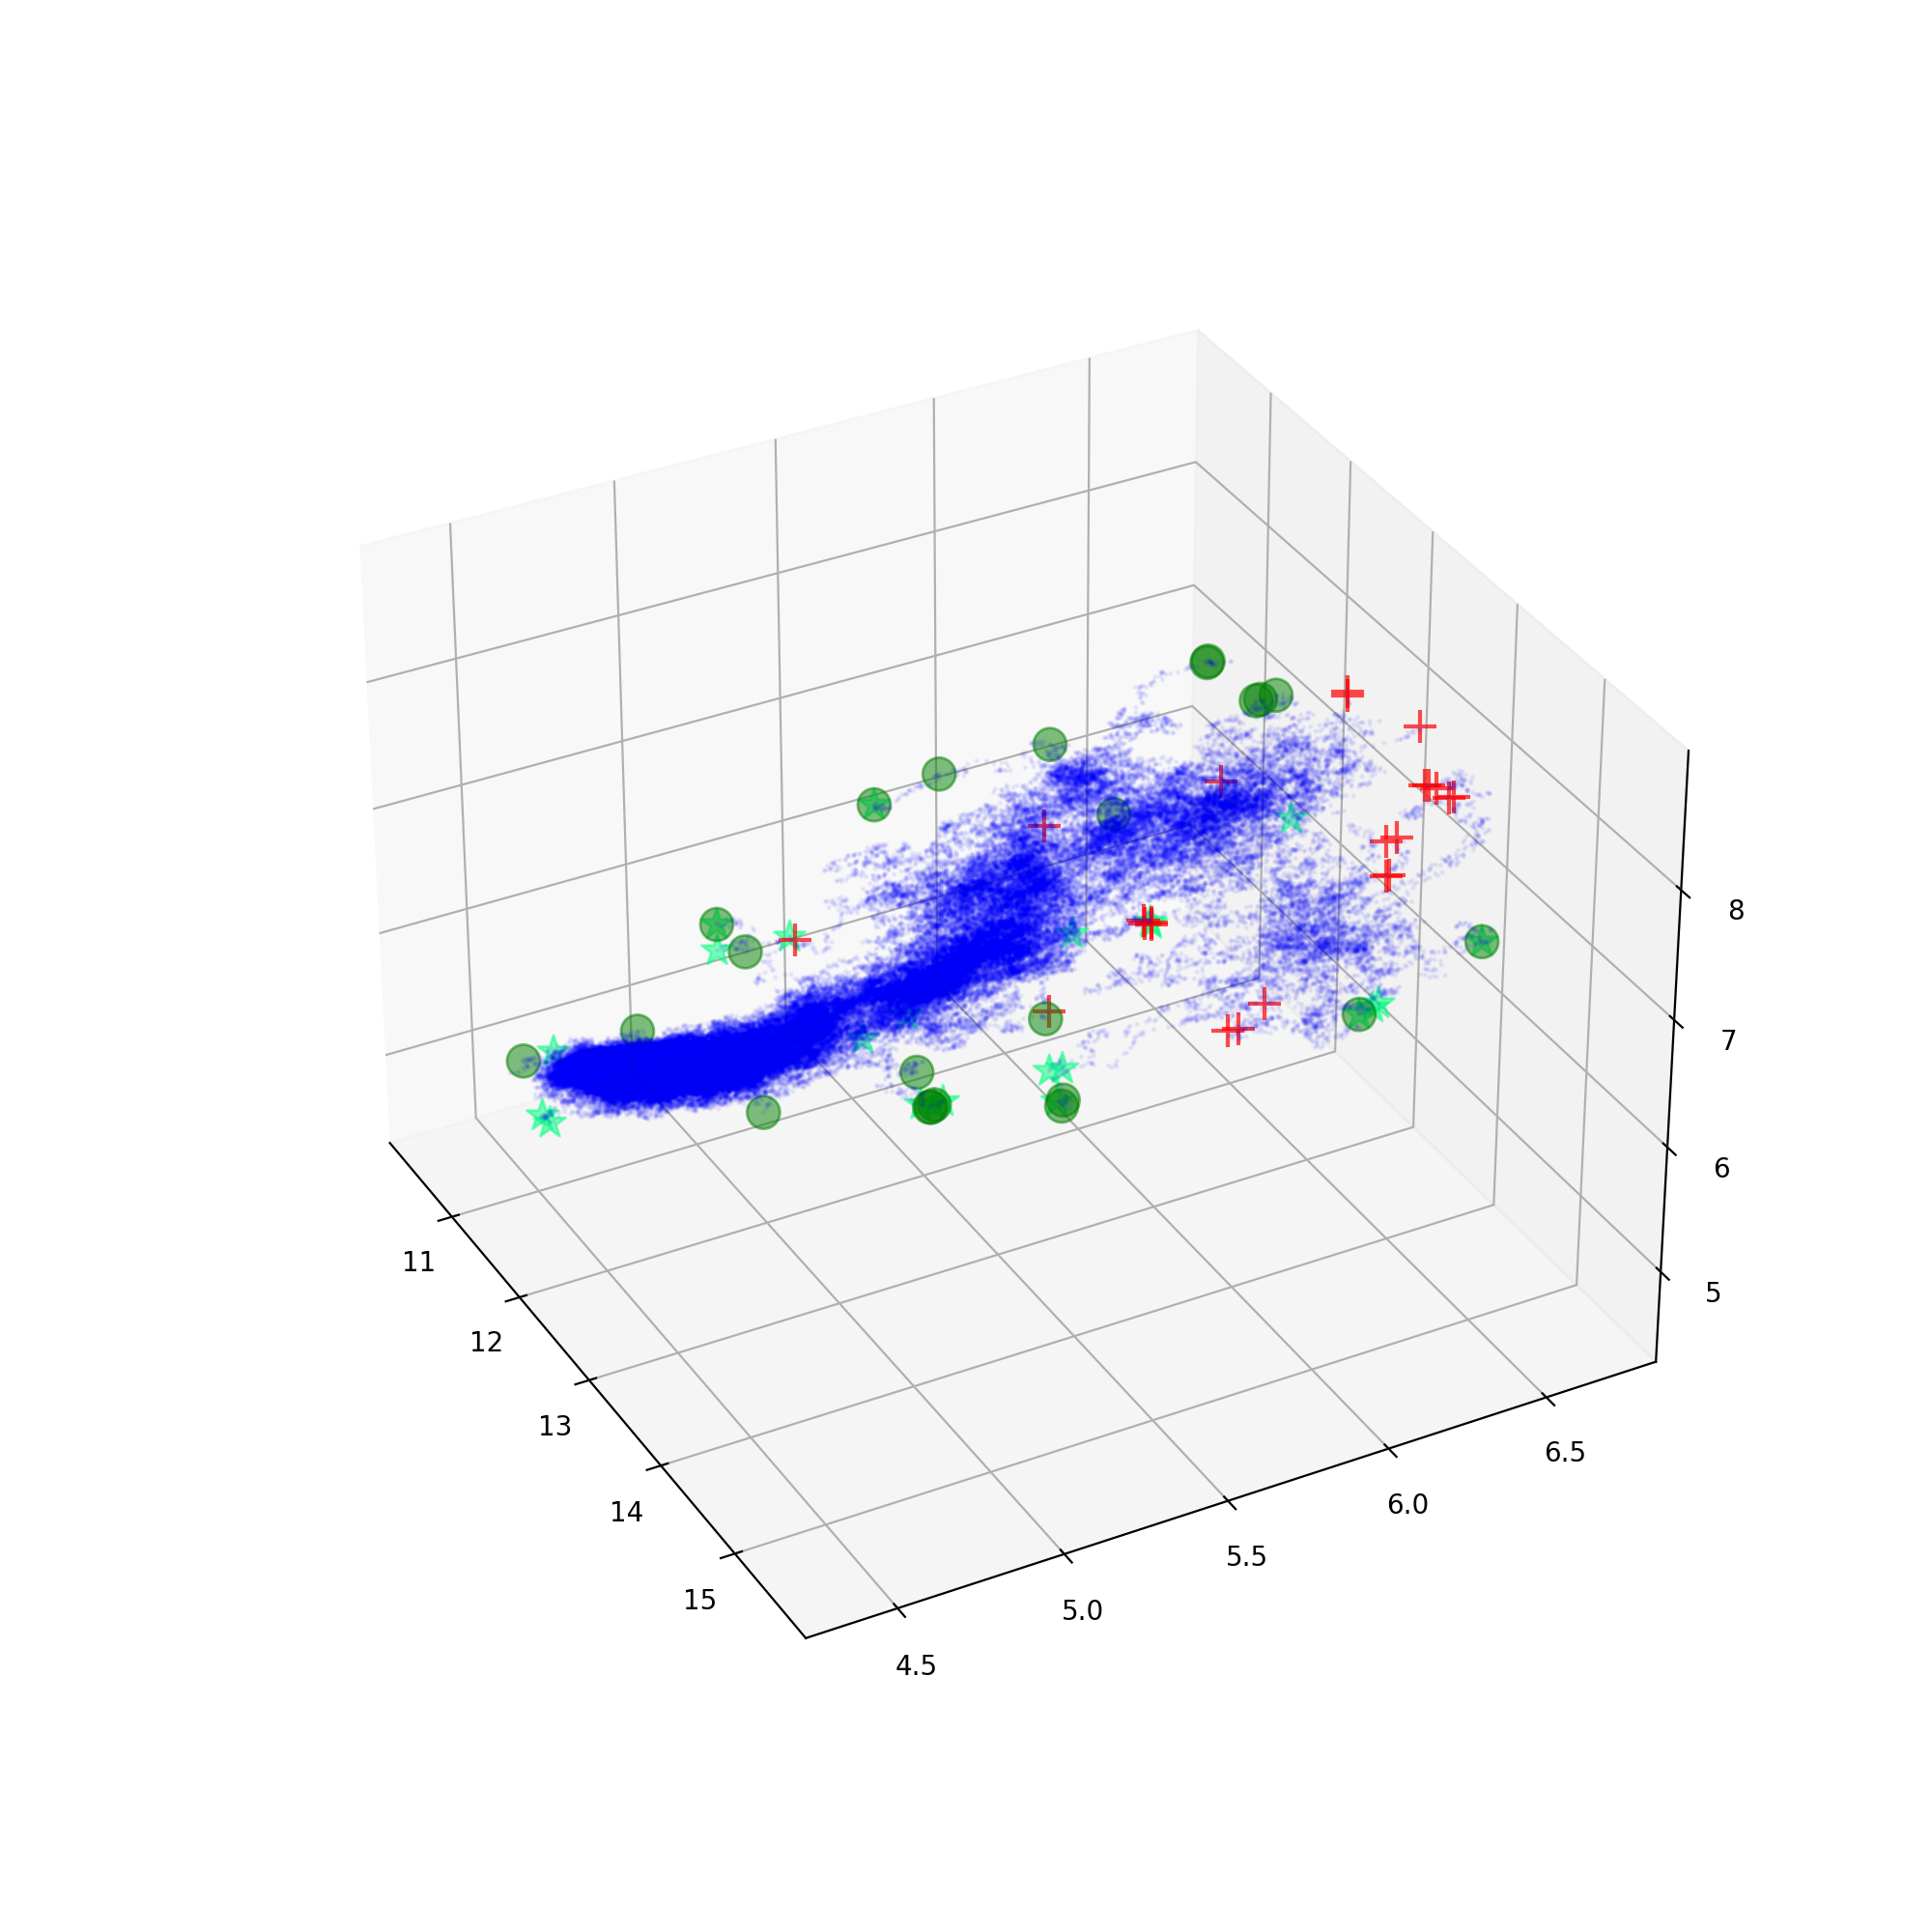

In [3]:
fig = plt.figure(figsize=(10,10))
M = np.array(df[['x', 'y', 'z']])
x = M[:,0]
y = M[:,1]
z = M[:,2]


xd = Md[:,0]
yd = Md[:,1]
zd = Md[:,2]

'''
xgd = Md_group[:,0]
ygd = Md_group[:,1]
zgd = Md_group[:,2]
'''

xv = Mv[:,0]
yv = Mv[:,1]
zv = Mv[:,2]

xkde = Mkde[:,0]
ykde = Mkde[:,1]
zkde = Mkde[:,2]


ax = fig.add_subplot(projection='3d')
 
#散布図の作成
ax.scatter(x,y,z,s=1,c='blue', alpha=0.05)
ax.scatter(xd,yd,zd,s=150,c='springgreen', marker='*', alpha=0.5) 
#ax.plot(xgd, ygd, zgd, c='springgreen', alpha=1)
ax.scatter(xv, yv, zv, s=150, c="green", marker='o', alpha=0.5)
ax.scatter(xkde, ykde, zkde, s=150, c='red', marker='+', alpha=0.7)

#描画
plt.show()

In [8]:
len(M)**(-1/M.shape[1])

0.013595011650672804

In [1]:
from scripts.analysis import Analyzer 
path = '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/trial_9/'

analysis = Analyzer(path)





In [ ]:
analysis.kernel_density_estimation()

In [ ]:
M = analysis.points
len(M)

In [1]:
from scripts.load_file import FileLoader
import pandas as pd
import numpy as np
path = '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/trial_9/'
data = pd.DataFrame(FileLoader.construct_data(path), columns=['time', 'x', 'y', 'z', 'trial', 'cycle', 'reprica'])
points = np.array(data.loc[:, ['x', 'y', 'z']], dtype='float')

In [5]:
import numpy as np
s = np.array([[1,2,3],[9,3,4]])
s - np.mean(s, axis=0)

array([[-4. , -0.5, -0.5],
       [ 4. ,  0.5,  0.5]])

In [4]:
points

array([[14.1225 ,  5.9666 ,  8.28603],
       [14.1018 ,  5.95044,  8.2559 ],
       [14.104  ,  5.93032,  8.27642],
       ...,
       [14.0469 ,  5.37074,  8.37369],
       [14.0399 ,  5.37159,  8.38832],
       [14.0334 ,  5.39406,  8.39643]])

In [2]:
from scripts.model.models import KernelDesityEstimation

k = KernelDesityEstimation(points[:10000])
k.density_estimation(alg='kd_tree')

{0: 3.317160584692239,
 1: 3.4051328480977743,
 2: 3.9065407894387647,
 3: 3.866836103923175,
 4: 3.908570686163412,
 5: 4.0160869963141925,
 6: 3.984581704949841,
 7: 3.900123747099,
 8: 3.705353365440453,
 9: 3.6672455751236366,
 10: 3.420171805171927,
 11: 3.474532207129258,
 12: 3.1768672085971152,
 13: 2.0611941648466363,
 14: 1.4110482807301639,
 15: 2.087438647851789,
 16: 2.252053915463579,
 17: 2.7291456341692575,
 18: 2.364106892870639,
 19: 2.7736949952996737,
 20: 2.774128171603207,
 21: 1.8009723509016022,
 22: 1.5779549936914463,
 23: 1.707813659214462,
 24: 1.9283777902754535,
 25: 2.01458195346914,
 26: 2.3293681189008506,
 27: 2.304105115554122,
 28: 2.5013371161324414,
 29: 1.7588231953422229,
 30: 1.6983588382257833,
 31: 2.096462413580935,
 32: 2.019852051920972,
 33: 2.087928776829444,
 34: 1.763263686837567,
 35: 1.9628229866489333,
 36: 2.1274228443242427,
 37: 2.2390808379165645,
 38: 2.3051905373634756,
 39: 2.265621488781239,
 40: 2.2925220430010262,
 41: 1.93

In [11]:
from scripts.tessellation import Tessellation
t = Tessellation(points[:10000])
t.delaunay_cal()
t.d_points_volumes
t.d_model.points

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 976009.68it/s]


array([[2.6072267 , 0.84700754, 2.76366318],
       [2.5865267 , 0.83084754, 2.73353318],
       [2.5887267 , 0.81072754, 2.75405318],
       ...,
       [2.5261267 , 0.60346754, 2.45296318],
       [2.5081267 , 0.60640754, 2.46547318],
       [2.5125267 , 0.61932754, 2.46314318]])

In [23]:
import sklearn
import numpy as np
kde = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth='scott', algorithm='kd_tree').fit(M)
list(np.exp((kde.score_samples(M[10000:10100]))))



[0.04116787510873057,
 0.0415524584779691,
 0.04447216767668557,
 0.04206301422978479,
 0.045462202239337765,
 0.05081835249680657,
 0.04886721382778128,
 0.04523699709740761,
 0.04605080828296077,
 0.04808047470110454,
 0.044279451199377796,
 0.0420017081953114,
 0.0424540610349351,
 0.04079033267839023,
 0.041067431752716786,
 0.04198113967194696,
 0.046147266839441224,
 0.04868451081797959,
 0.05063100061280944,
 0.04818273945075927,
 0.0488195665348368,
 0.04963579179126893,
 0.04742572913095444,
 0.043549963679873814,
 0.04280190377090754,
 0.04162344452865633,
 0.04528441865623013,
 0.05257377947833573,
 0.05844746527793849,
 0.0625906371948841,
 0.06338800558843828,
 0.05984259914093574,
 0.057172177608385694,
 0.05864113211533329,
 0.05952823748107045,
 0.06416456462185866,
 0.0627479000062844,
 0.058664627751203874,
 0.054201857980325674,
 0.0512164027530732,
 0.04867389539675823,
 0.048424851609853346,
 0.04983130009277714,
 0.05439037509284354,
 0.06021961624049477,
 0.06457

In [5]:
import sklearn

kde = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth='scott', algorithm='kd_tree').fit(M)
list(np.array((kde.score_samples(M[:8]))))

from .scripts.model.models import KernelDesityEstimation


NameError: name 'M' is not defined

In [14]:
from scripts.model.models import KernelDesityEstimation

In [17]:
a = KernelDesityEstimation(M[:100])

AttributeError: 'KernelDesityEstimation' object has no attribute 'model'

In [18]:
from scripts.analysis import Analyzer 
path = '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/trial_8/'

analysis = Analyzer(path)



In [ ]:
analysis.kernel_density_estimation()



In [ ]:
analysis.points


In [ ]:
analysis.kde_density

In [ ]:
analysis.kde_show_data()

In [16]:
a.density_estimation(alg='kd_tree')

{0: 5.819562204831075,
 1: 5.734032098356943,
 2: 5.898846203323803,
 3: 5.857643490734591,
 4: 5.95063647355404,
 5: 5.879821118706434,
 6: 5.850682646308002,
 7: 5.827745630657624,
 8: 5.774436988541772,
 9: 5.857469614384416,
 10: 5.918535928880801,
 11: 5.949401560850302,
 12: 5.946520243538281,
 13: 5.709833148285178,
 14: 5.485816156417493,
 15: 5.6967134689567205,
 16: 5.737450605482076,
 17: 5.864162048613719,
 18: 5.729512991591283,
 19: 5.854878566286959,
 20: 5.8717118502297,
 21: 5.560035397177656,
 22: 5.475796627799517,
 23: 5.571487247949895,
 24: 5.639074105049971,
 25: 5.728294103174132,
 26: 5.793640917753591,
 27: 5.745462171702908,
 28: 5.766719650155239,
 29: 5.57071298193779,
 30: 5.579343508104226,
 31: 5.749426178690062,
 32: 5.701203892962928,
 33: 5.7065305557805885,
 34: 5.592168986491873,
 35: 5.5945699171011825,
 36: 5.617454090403886,
 37: 5.630934166295654,
 38: 5.649086853777675,
 39: 5.637072686000469,
 40: 5.64858902065345,
 41: 5.511742847727394,
 42:

In [224]:
c = b.tolist()


In [8]:
pip install sklearn

SyntaxError: invalid syntax (<ipython-input-8-c935c0eb4218>, line 1)

In [4]:
pip install --upgrade sklearn=='1.2'

ERROR: Could not find a version that satisfies the requirement sklearn==1.2 (from versions: 0.0, 0.0.post1, 0.0.post2)
ERROR: No matching distribution found for sklearn==1.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn

In [2]:
sklearn.__version__

'1.2.1'

In [30]:
import glob
import pathlib
import shutil
import sys
import tqdm
import os


data_path = '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files'

for i in range(31):
    os.mkdir('/data/bachelor/analysis_result/' + 'trial' + '{}'.format(i))
    to_path = '/data/bachelor/analysis_result/' + 'trial' + '{}'.format(i)
    files = glob.glob(os.path.join(directory_path, 't' + '{}'.format(i)+ '*' +  '.txt'))
    for path in files:
        shutil.copyfile(path, to_path + '/')
        


"\nfor i in range(31):\n    files = glob.glob(os.path.join(directory_path, 't' + '{i}'.format(i)+ suffix))\n"

In [37]:
os.mkdir('/data/bachelor/analysis_result/')

In [33]:
files = glob.glob(os.path.join(data_path, 't' + '{}'.format(i) + '*' + '.txt'))

In [35]:
files

['/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-16-27.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-40-7.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-23-4.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-44-13.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-11-12.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-43-26.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-18-22.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-1-7.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-18-2.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-30-23.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files/t3-39-13.txt',
 '/Users/mukaiyama/research/kitao/Delaunay/data/

In [ ]:
data_path = '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/txt_files'

for i in range(31):
    files = glob.glob(os.path.join(directory_path, 't' + '{i}'.format(i)+ suffix))

In [36]:
'{}'.format(1)

'1'

In [39]:
for i in range(1,4):
    print(i)

1
2
3


In [12]:
from sklearn import neighbors
import numpy as np

In [39]:
import sklearn

In [15]:
len(x)**(-1./(x.shape[1]))

0.7598356856515925

In [72]:
for i, j in enumerate(list(x)):
    print(j)

[1 2 3]
[6 5 5]
[2 1 4]
[9 3 1]


In [91]:
x[:2]

array([[1, 2, 3],
       [6, 5, 5]])

In [13]:
x = np.array([[1,2,3], [6,5,5], [2,1,4], [9,3,1]])


kde = sklearn.neighbors.KernelDensity(kernel='gaussian', algorithm='kd_tree', bandwidth=len(x)**(-1./(x.shape[1]))).fit(x)

In [15]:
indices = [index for index in range(len(x))]

dict(zip(indices, list(np.exp(kde.score_samples(x)))))

{0: 0.06494307485403848,
 1: 0.06349363593424101,
 2: 0.06494307485403848,
 3: 0.06349363593424101}

In [48]:
pip install update sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2935 sha256=916de00460c79144e43f1f93a493266f98d2c6c2cc0dd474924f1a838d708fde
  Stored in directory: /Users/mukaiyama/Library/Caches/pip/wheels/db/9f/0b/772886b624f84c138a5febb6966c89d374ab58c62bd65d109e
Successfully built sklearn

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
np.exp(1)

2.718281828459045